<a href="https://colab.research.google.com/github/caturpramono/uts_ai/blob/main/uts_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rute terbaik: [np.int64(8), np.int64(5), np.int64(2), np.int64(0), np.int64(7), np.int64(4), np.int64(3), np.int64(9), np.int64(6), np.int64(1)]
Jarak total: 284.943528756313


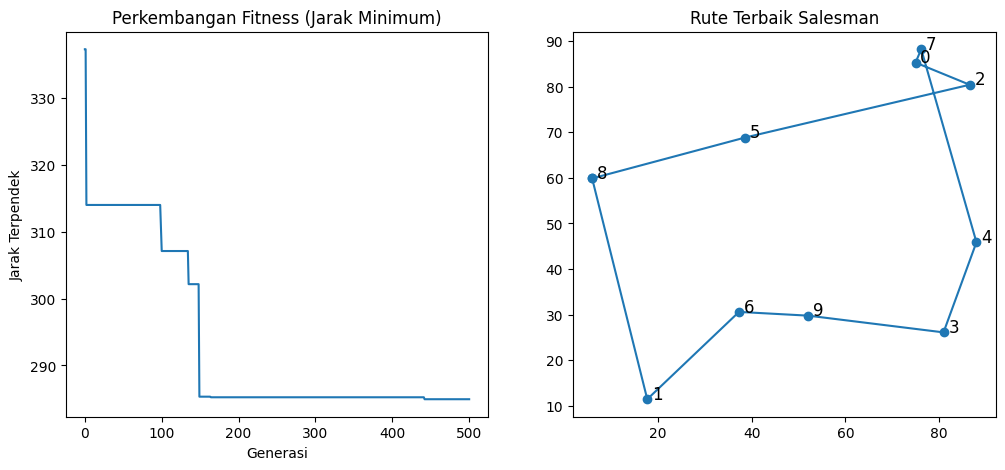

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# === 1. Membuat data kota (koordinat acak) ===
num_cities = 10
cities = np.random.rand(num_cities, 2) * 100  # 10 kota dengan koordinat acak (0–100)

# Fungsi untuk menghitung jarak antar dua kota
def distance(city1, city2):
    return np.sqrt(np.sum((city1 - city2) ** 2))

# Fungsi untuk menghitung total jarak sebuah rute
def total_distance(route):
    dist = 0
    for i in range(len(route)):
        dist += distance(cities[route[i - 1]], cities[route[i]])
    return dist

# === 2. Inisialisasi populasi ===
def create_initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(np.random.permutation(num_cities))
        population.append(route)
    return population

# === 3. Evaluasi fitness ===
def fitness(route):
    return 1 / total_distance(route)

# === 4. Seleksi (Roulette Wheel Selection) ===
def selection(population):
    fitness_scores = [fitness(route) for route in population]
    total_fit = sum(fitness_scores)
    probs = [f / total_fit for f in fitness_scores]
    return population[np.random.choice(len(population), p=probs)]

# === 5. Crossover (Order Crossover - OX) ===
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[start:end] = parent1[start:end]

    fill_values = [gene for gene in parent2 if gene not in child]
    pointer = 0
    for i in range(len(child)):
        if child[i] is None:
            child[i] = fill_values[pointer]
            pointer += 1
    return child

# === 6. Mutasi (swap mutation) ===
def mutate(route, mutation_rate=0.02):
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

# === 7. Algoritma GA utama ===
def genetic_algorithm(pop_size=100, generations=500, mutation_rate=0.02):
    population = create_initial_population(pop_size, num_cities)
    best_route = min(population, key=total_distance)
    best_distance = total_distance(best_route)
    progress = [best_distance]

    for gen in range(generations):
        new_population = []
        for _ in range(pop_size):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population
        current_best = min(population, key=total_distance)
        current_distance = total_distance(current_best)

        if current_distance < best_distance:
            best_distance = current_distance
            best_route = current_best

        progress.append(best_distance)

    return best_route, best_distance, progress

# === 8. Jalankan GA ===
best_route, best_distance, progress = genetic_algorithm(pop_size=100, generations=500, mutation_rate=0.02)

print("Rute terbaik:", best_route)
print("Jarak total:", best_distance)

# === 9. Visualisasi hasil ===
plt.figure(figsize=(12,5))

# Grafik konvergensi
plt.subplot(1,2,1)
plt.plot(progress)
plt.title('Perkembangan Fitness (Jarak Minimum)')
plt.xlabel('Generasi')
plt.ylabel('Jarak Terpendek')

# Peta rute terbaik
plt.subplot(1,2,2)
route_cities = np.array([cities[i] for i in best_route + [best_route[0]]])
plt.plot(route_cities[:,0], route_cities[:,1], marker='o')
plt.title('Rute Terbaik Salesman')
for i, (x, y) in enumerate(cities):
    plt.text(x+1, y, str(i), fontsize=12)
plt.show()
